In [72]:
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.types import (
    StructType,
    StructField,
    IntegerType,
    StringType,
    DoubleType,
)
from pyspark.sql.functions import col

In [3]:
spark = SparkSession.builder.appName("BMW Sales Analysis").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

In [4]:
schema = StructType(
    [
        StructField("Year", IntegerType(), True),
        StructField("Month", IntegerType(), True),
        StructField("Model", StringType(), True),
        StructField("Units_Sold", IntegerType(), True),
        StructField("Price", DoubleType(), True),
        StructField("Revenue", DoubleType(), True),
        StructField("Dealer", StringType(), True),
        StructField("Region", StringType(), True),
        StructField("Fuel_Type", StringType(), True),
        StructField("Transmission", StringType(), True),
    ]
)

df = spark.read.csv(
    path="dataset/bmw_car_sales_2010_2024.csv",
    schema=schema,
    header=True,
    mode="PERMISSIVE",
)

In [5]:
df.show(10)
df.printSchema()

+----+-----+--------+----------+---------+------------------+---------+-------------+---------+------------+
|Year|Month|   Model|Units_Sold|    Price|           Revenue|   Dealer|       Region|Fuel_Type|Transmission|
+----+-----+--------+----------+---------+------------------+---------+-------------+---------+------------+
|2020|    2|3 Series|        24| 47143.54|        1131444.96|Dealer_16|       Europe|   Diesel|      Manual|
|2020|   12|      i8|        16|129651.43|        2074422.88|Dealer_28|North America|   Petrol|      Manual|
|2013|    4|      i8|        22|151284.79|3328265.3800000004|Dealer_36|       Europe| Electric|      Manual|
|2017|   10|      X3|        26|  54855.8|         1426250.8| Dealer_1|       Europe| Electric|   Automatic|
|2014|    3|      X1|        16| 41550.74|         664811.84|Dealer_22|North America|   Petrol|   Automatic|
|2011|    6|      X5|        18| 70272.66|1264907.8800000001| Dealer_3|       Africa| Electric|      Manual|
|2024|    7|5 Serie

In [6]:
df.createOrReplaceTempView("BMW")  # This tempirary view will be used for SQL queries

In [11]:
sales_per_year = spark.sql(
    """
    select year, sum(units_sold) as units_per_year from bmw 
    group by year 
    order by units_per_year desc
    """
)
sales_per_year.show()

highest_sale = spark.sql(
    """
    select year, sum(units_sold) as units_per_year
    from bmw
    group by year
    order by units_per_year desc
    limit 1
    """
)
highest_sale.show()

+----+--------------+
|year|units_per_year|
+----+--------------+
|2011|          8261|
|2024|          8151|
|2022|          8074|
|2020|          8031|
|2010|          7983|
|2021|          7868|
|2017|          7737|
|2016|          7710|
|2012|          7657|
|2014|          7621|
|2018|          7562|
|2013|          7311|
|2015|          7278|
|2023|          7250|
|2019|          6922|
+----+--------------+

+----+--------------+
|year|units_per_year|
+----+--------------+
|2011|          8261|
+----+--------------+



In [57]:
sales_per_year = spark.sql(
    """
    select year, sum(units_sold) as units_per_year from bmw 
    group by year 
    order by year asc
    """
)
sales_per_year.show(3)

+----+--------------+
|year|units_per_year|
+----+--------------+
|2010|          7983|
|2011|          8261|
|2012|          7657|
+----+--------------+
only showing top 3 rows


In [ ]:
years = [year for year in range(2010, 2025)]
total_units_sold = [
    row["units_per_year"] for row in sales_per_year.select("units_per_year").collect()
]
print(total_units_sold)

[7983, 8261, 7657, 7311, 7621, 7278, 7710, 7737, 7562, 6922, 8031, 7868, 8074, 7250, 8151]


/tmp/ipykernel_2987/1245526569.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


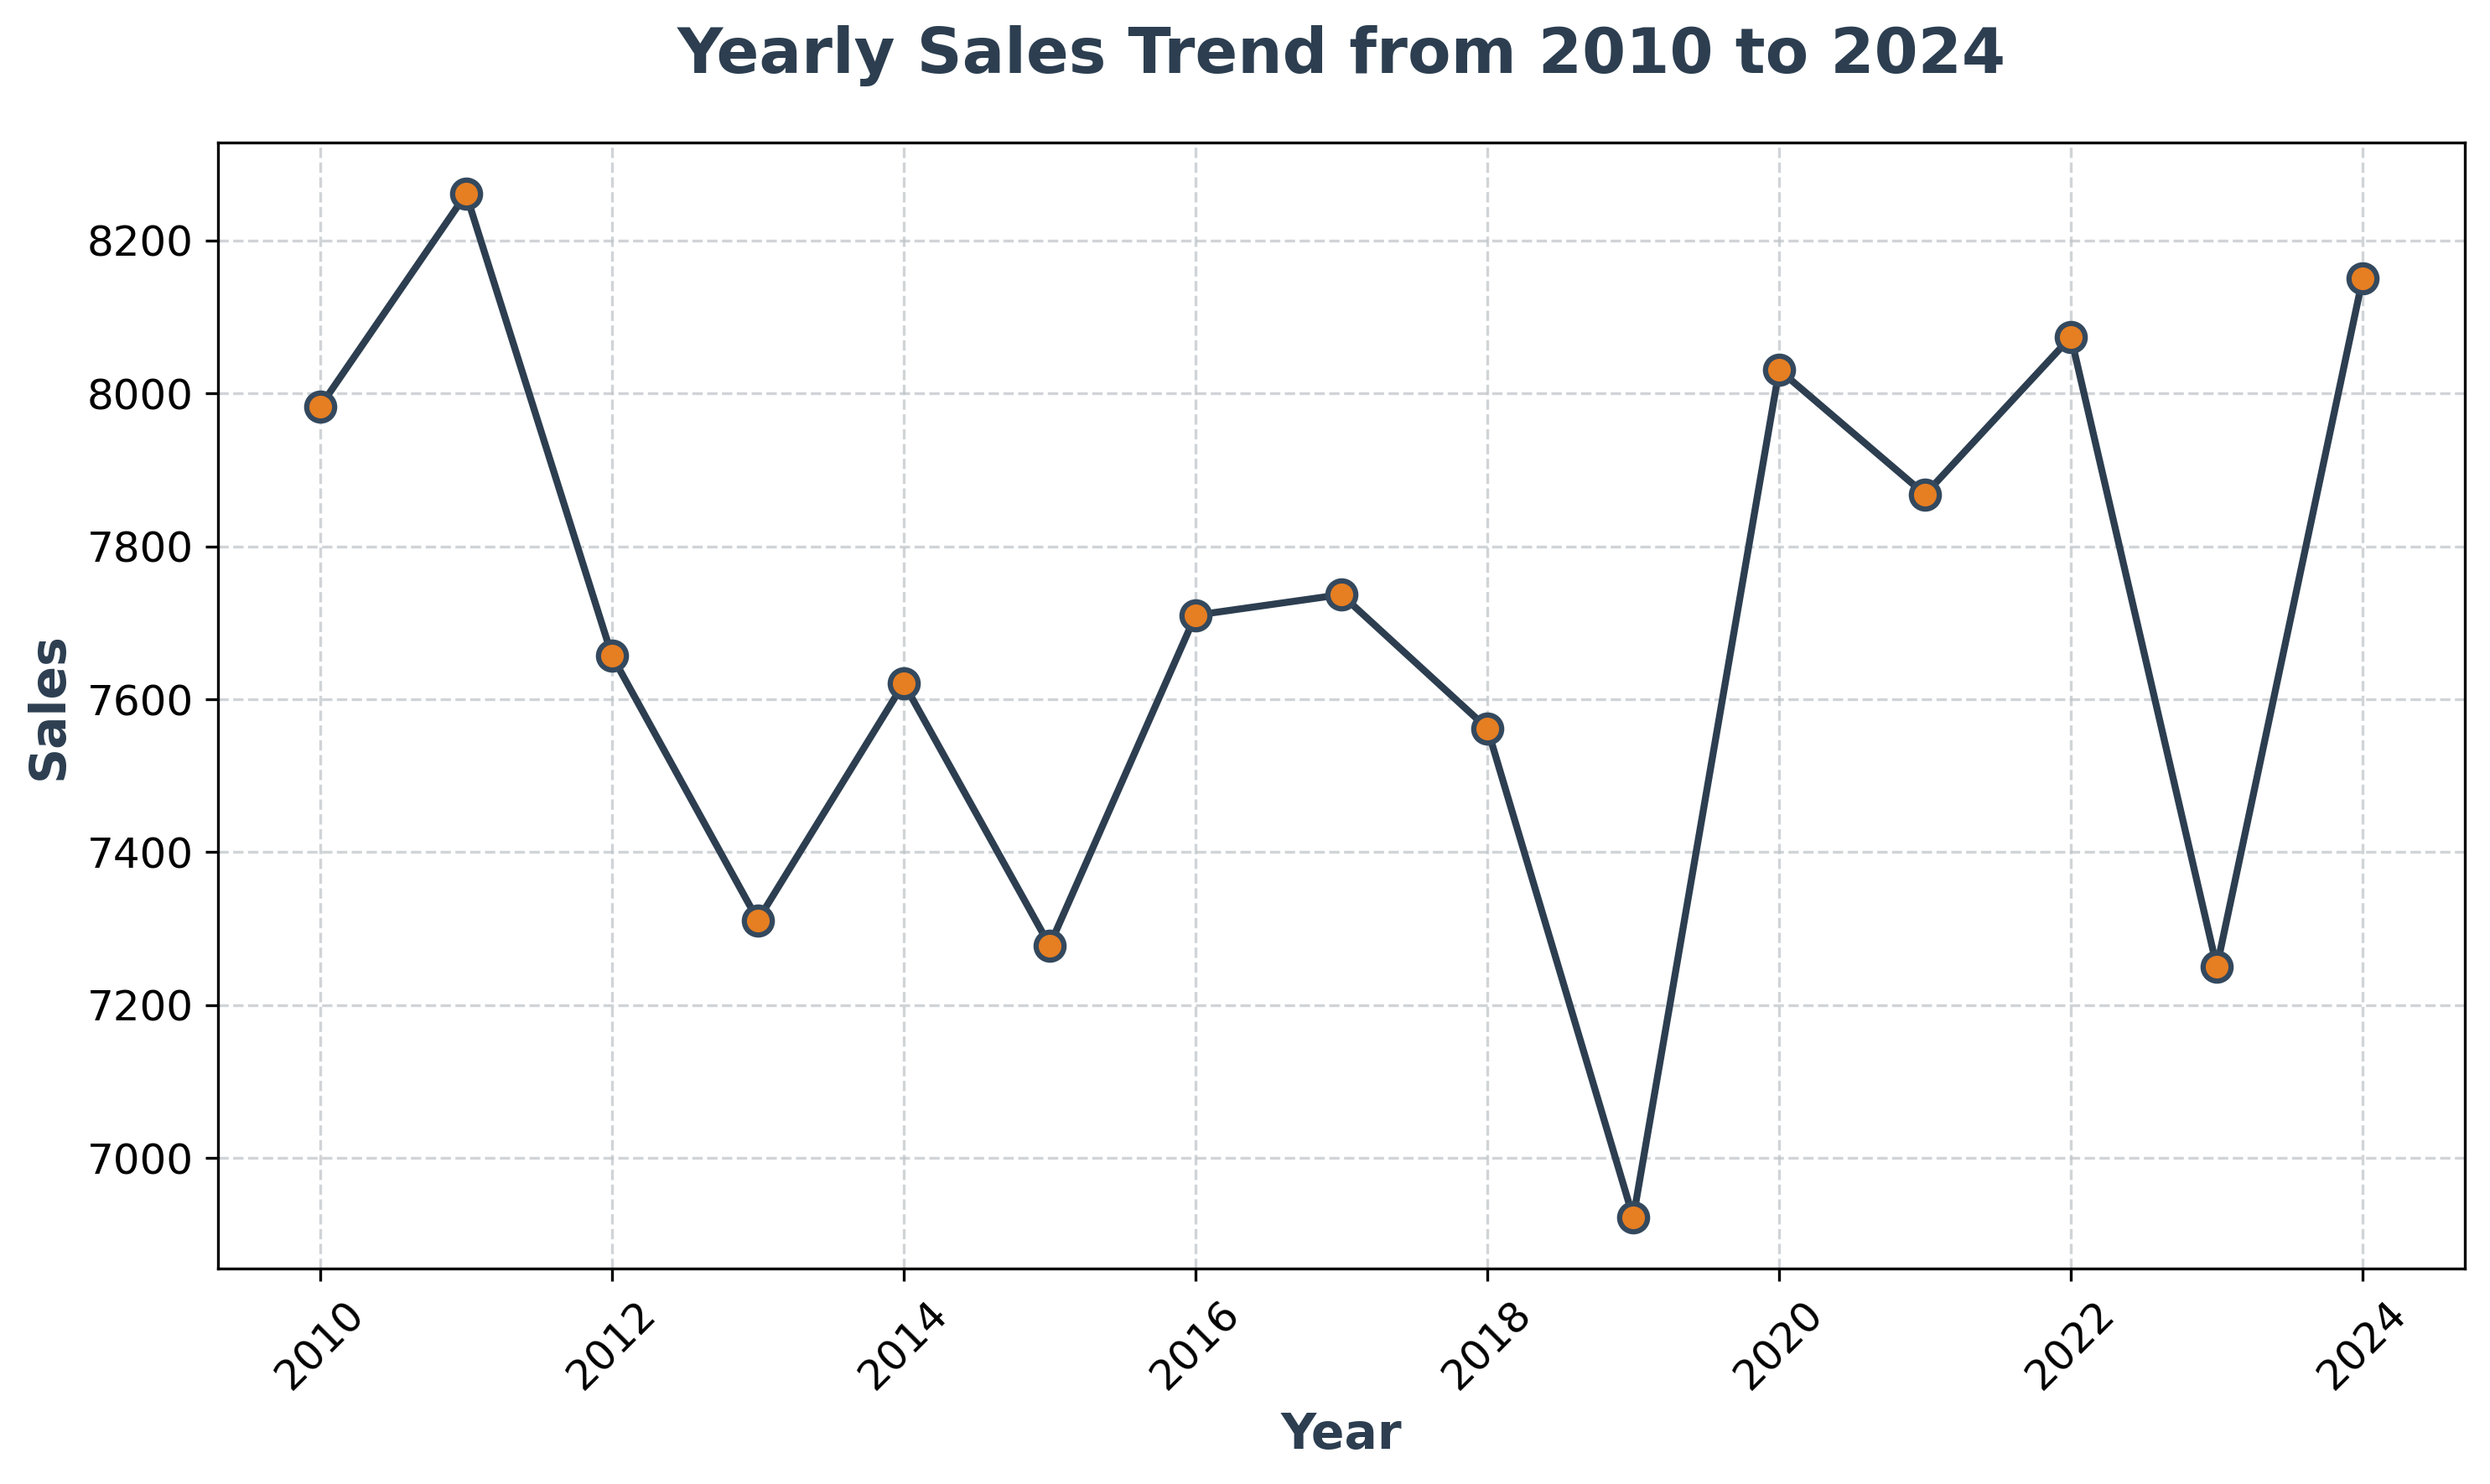

In [70]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(10, 6), dpi=300, constrained_layout=True
)

ax.plot(
    years,
    total_units_sold,
    color="#2c3e50",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="#e67e22",
    markeredgecolor="#34495e",
    markeredgewidth=1.5,
)

ax.grid(
    visible=True,
    which="major",
    axis="both",
    color="#bdc3c7",
    linestyle="--",
    linewidth=0.8,
    alpha=0.7,
)

ax.set_title(
    "Yearly Sales Trend from 2010 to 2024",
    fontsize=18,
    fontweight="bold",
    color="#2c3e50",
    pad=20,
)
ax.set_xlabel("Year", fontsize=14, fontweight="bold", color="#2c3e50")
ax.set_ylabel("Sales", fontsize=14, fontweight="bold", color="#2c3e50")

ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()

### Regional Revenue Over Time

In [71]:
revenue_region_year = spark.sql(
    """
    select year, region, round(sum(revenue)) as total_revenue_per_region 
    from BMW
    group by year, region
    order by year
    """
)
revenue_region_year.show()

+----+-------------+------------------------+
|year|       region|total_revenue_per_region|
+----+-------------+------------------------+
|2010|       Europe|             9.2958486E7|
|2010|North America|             9.3113978E7|
|2010|       Africa|             9.9904804E7|
|2010|         Asia|             7.9502164E7|
|2010|South America|             8.1351226E7|
|2010|  Middle East|            1.01642761E8|
|2011|  Middle East|             8.6705063E7|
|2011|North America|             9.5960755E7|
|2011|       Africa|             8.4748241E7|
|2011|       Europe|            1.04979648E8|
|2011|South America|            1.12666376E8|
|2011|         Asia|             9.7598354E7|
|2012|South America|             9.4403674E7|
|2012|  Middle East|             8.1509936E7|
|2012|         Asia|             9.2250921E7|
|2012|       Africa|             9.6003338E7|
|2012|North America|            1.02305952E8|
|2012|       Europe|             8.3969034E7|
|2013|       Europe|             6

In [90]:
years = [year for year in range(2010, 2025)]

# Europe
europe = revenue_region_year.filter(col("region") == "Europe").select(
    "total_revenue_per_region"
)
europe_values = [row["total_revenue_per_region"] for row in europe.collect()]

# Asia
asia = revenue_region_year.filter(col("region") == "Asia").select(
    "total_revenue_per_region"
)
asia_values = [row["total_revenue_per_region"] for row in asia.collect()]

# Africa
africa = revenue_region_year.filter(col("region") == "Africa").select(
    "total_revenue_per_region"
)
africa_values = [row["total_revenue_per_region"] for row in africa.collect()]

# South America
s_america = revenue_region_year.filter(col("region") == "South America").select(
    "total_revenue_per_region"
)
s_america_values = [row["total_revenue_per_region"] for row in s_america.collect()]

# North America
n_america = revenue_region_year.filter(col("region") == "North America").select(
    "total_revenue_per_region"
)
n_america_values = [row["total_revenue_per_region"] for row in n_america.collect()]

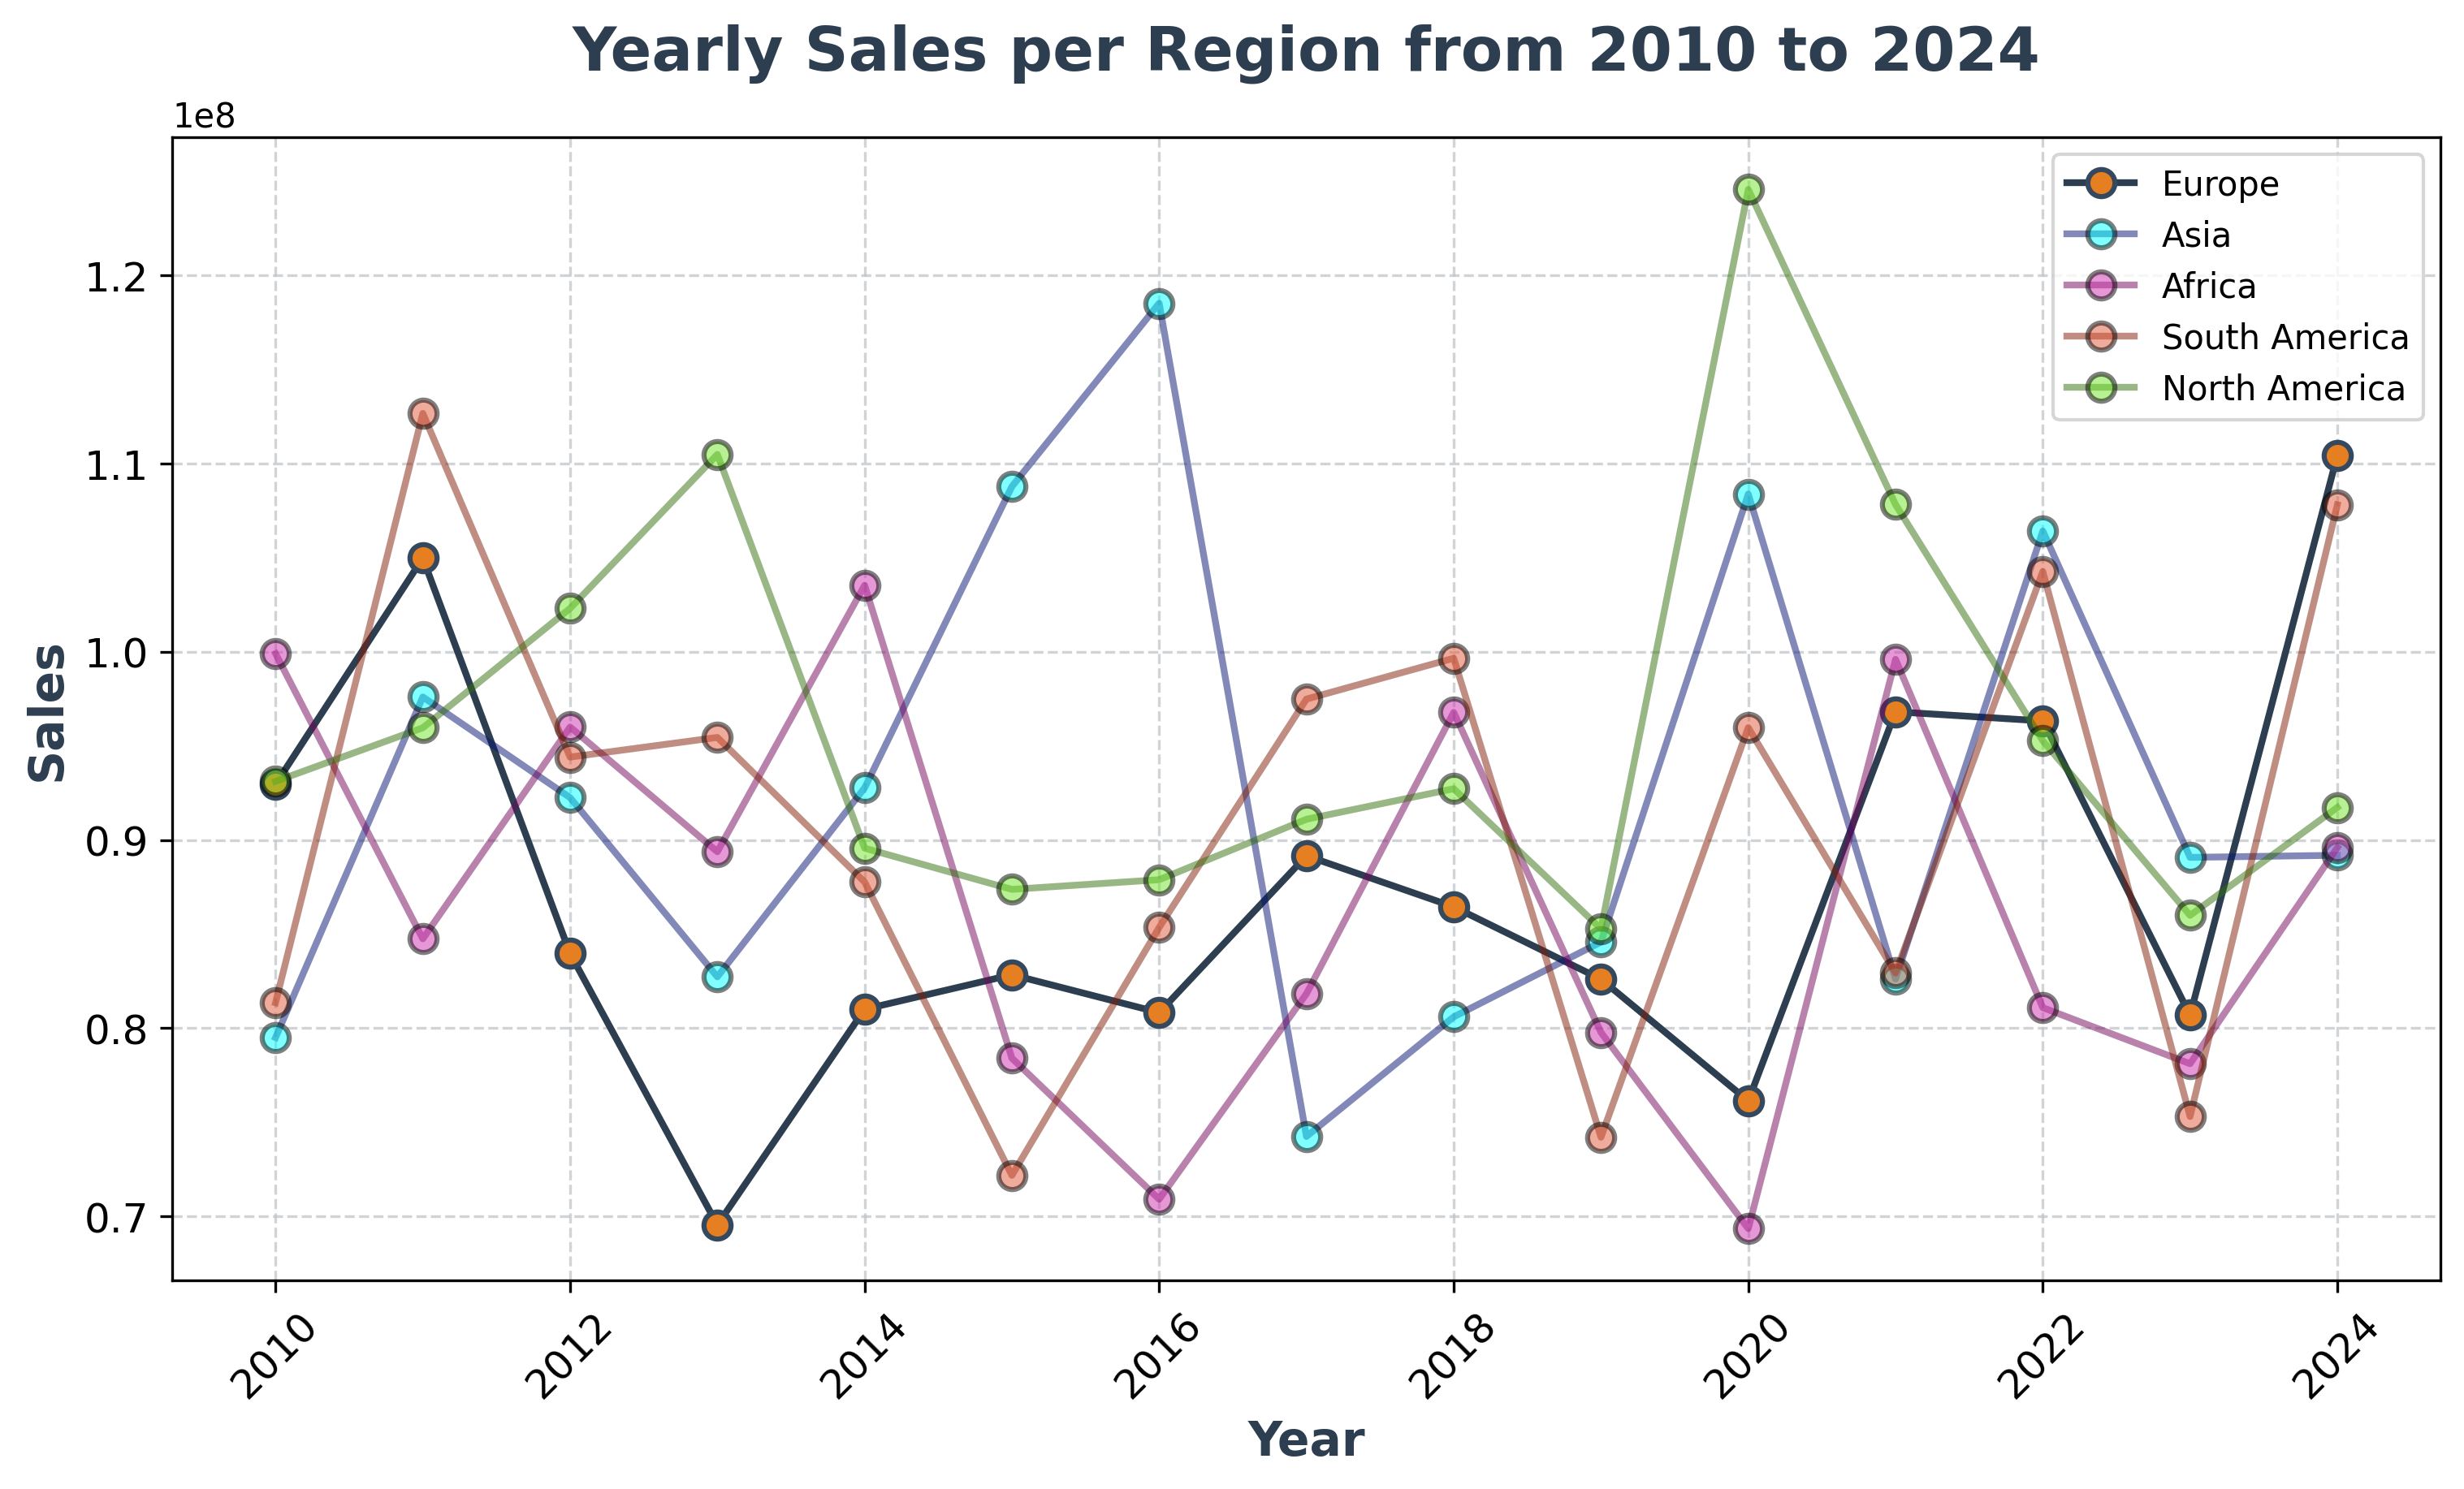

In [93]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(10, 6), dpi=300, constrained_layout=True
)

ax.plot(
    years,
    europe_values,
    color="#2c3e50",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="#e67e22",
    markeredgecolor="#34495e",
    markeredgewidth=1.5,
    label="Europe",
)

ax.plot(
    years,
    asia_values,
    color="#071573",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="cyan",
    markeredgecolor="black",
    markeredgewidth=1.5,
    label="Asia",
    alpha=0.5,
)

ax.plot(
    years,
    africa_values,
    color="#73075d",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="#cc33ad",
    markeredgecolor="black",
    markeredgewidth=1.5,
    label="Africa",
    alpha=0.5,
)

ax.plot(
    years,
    s_america_values,
    color="#801d06",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="#e0593a",
    markeredgecolor="black",
    markeredgewidth=1.5,
    label="South America",
    alpha=0.5,
)

ax.plot(
    years,
    n_america_values,
    color="#32700b",
    linestyle="-",
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor="#72e32b",
    markeredgecolor="black",
    markeredgewidth=1.5,
    label="North America",
    alpha=0.5,
)

ax.grid(
    visible=True,
    which="major",
    axis="both",
    color="#bdc3c7",
    linestyle="--",
    linewidth=0.8,
    alpha=0.7,
)

ax.set_title(
    "Yearly Sales per Region from 2010 to 2024",
    fontsize=18,
    fontweight="bold",
    color="#2c3e50",
    pad=20,
)
ax.set_xlabel("Year", fontsize=14, fontweight="bold", color="#2c3e50")
ax.set_ylabel("Sales", fontsize=14, fontweight="bold", color="#2c3e50")

ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.legend()
plt.show()

### Top 5 Models Sold Bar Chart

In [16]:
models_units = spark.sql(
    """
    select model, sum(units_sold) as units_sold,
           rank() over (order by sum(units_sold) desc) as rank
    from bmw
    group by model
    order by units_sold desc
    """
)
models_units.show()

top5_performers = spark.sql(
    """
    select model, sum(units_sold) as units_sold 
    from bmw
    group by model
    order by units_sold desc
    limit 5
    """
)
top5_performers.show()

+--------+----------+----+
|   model|units_sold|rank|
+--------+----------+----+
|      M3|     10203|   1|
|      X6|      9933|   2|
|      X3|      9714|   3|
|      i8|      9713|   4|
|5 Series|      9662|   5|
|7 Series|      9654|   6|
|      X5|      9654|   6|
|      i3|      9569|   8|
|      Z4|      9559|   9|
|      M5|      9409|  10|
|3 Series|      9240|  11|
|      X1|      9106|  12|
+--------+----------+----+

+--------+----------+
|   model|units_sold|
+--------+----------+
|      M3|     10203|
|      X6|      9933|
|      X3|      9714|
|      i8|      9713|
|5 Series|      9662|
+--------+----------+



In [95]:
models = [row["model"] for row in top5_performers.collect()]
units_sold = [row["units_sold"] for row in top5_performers.collect()]

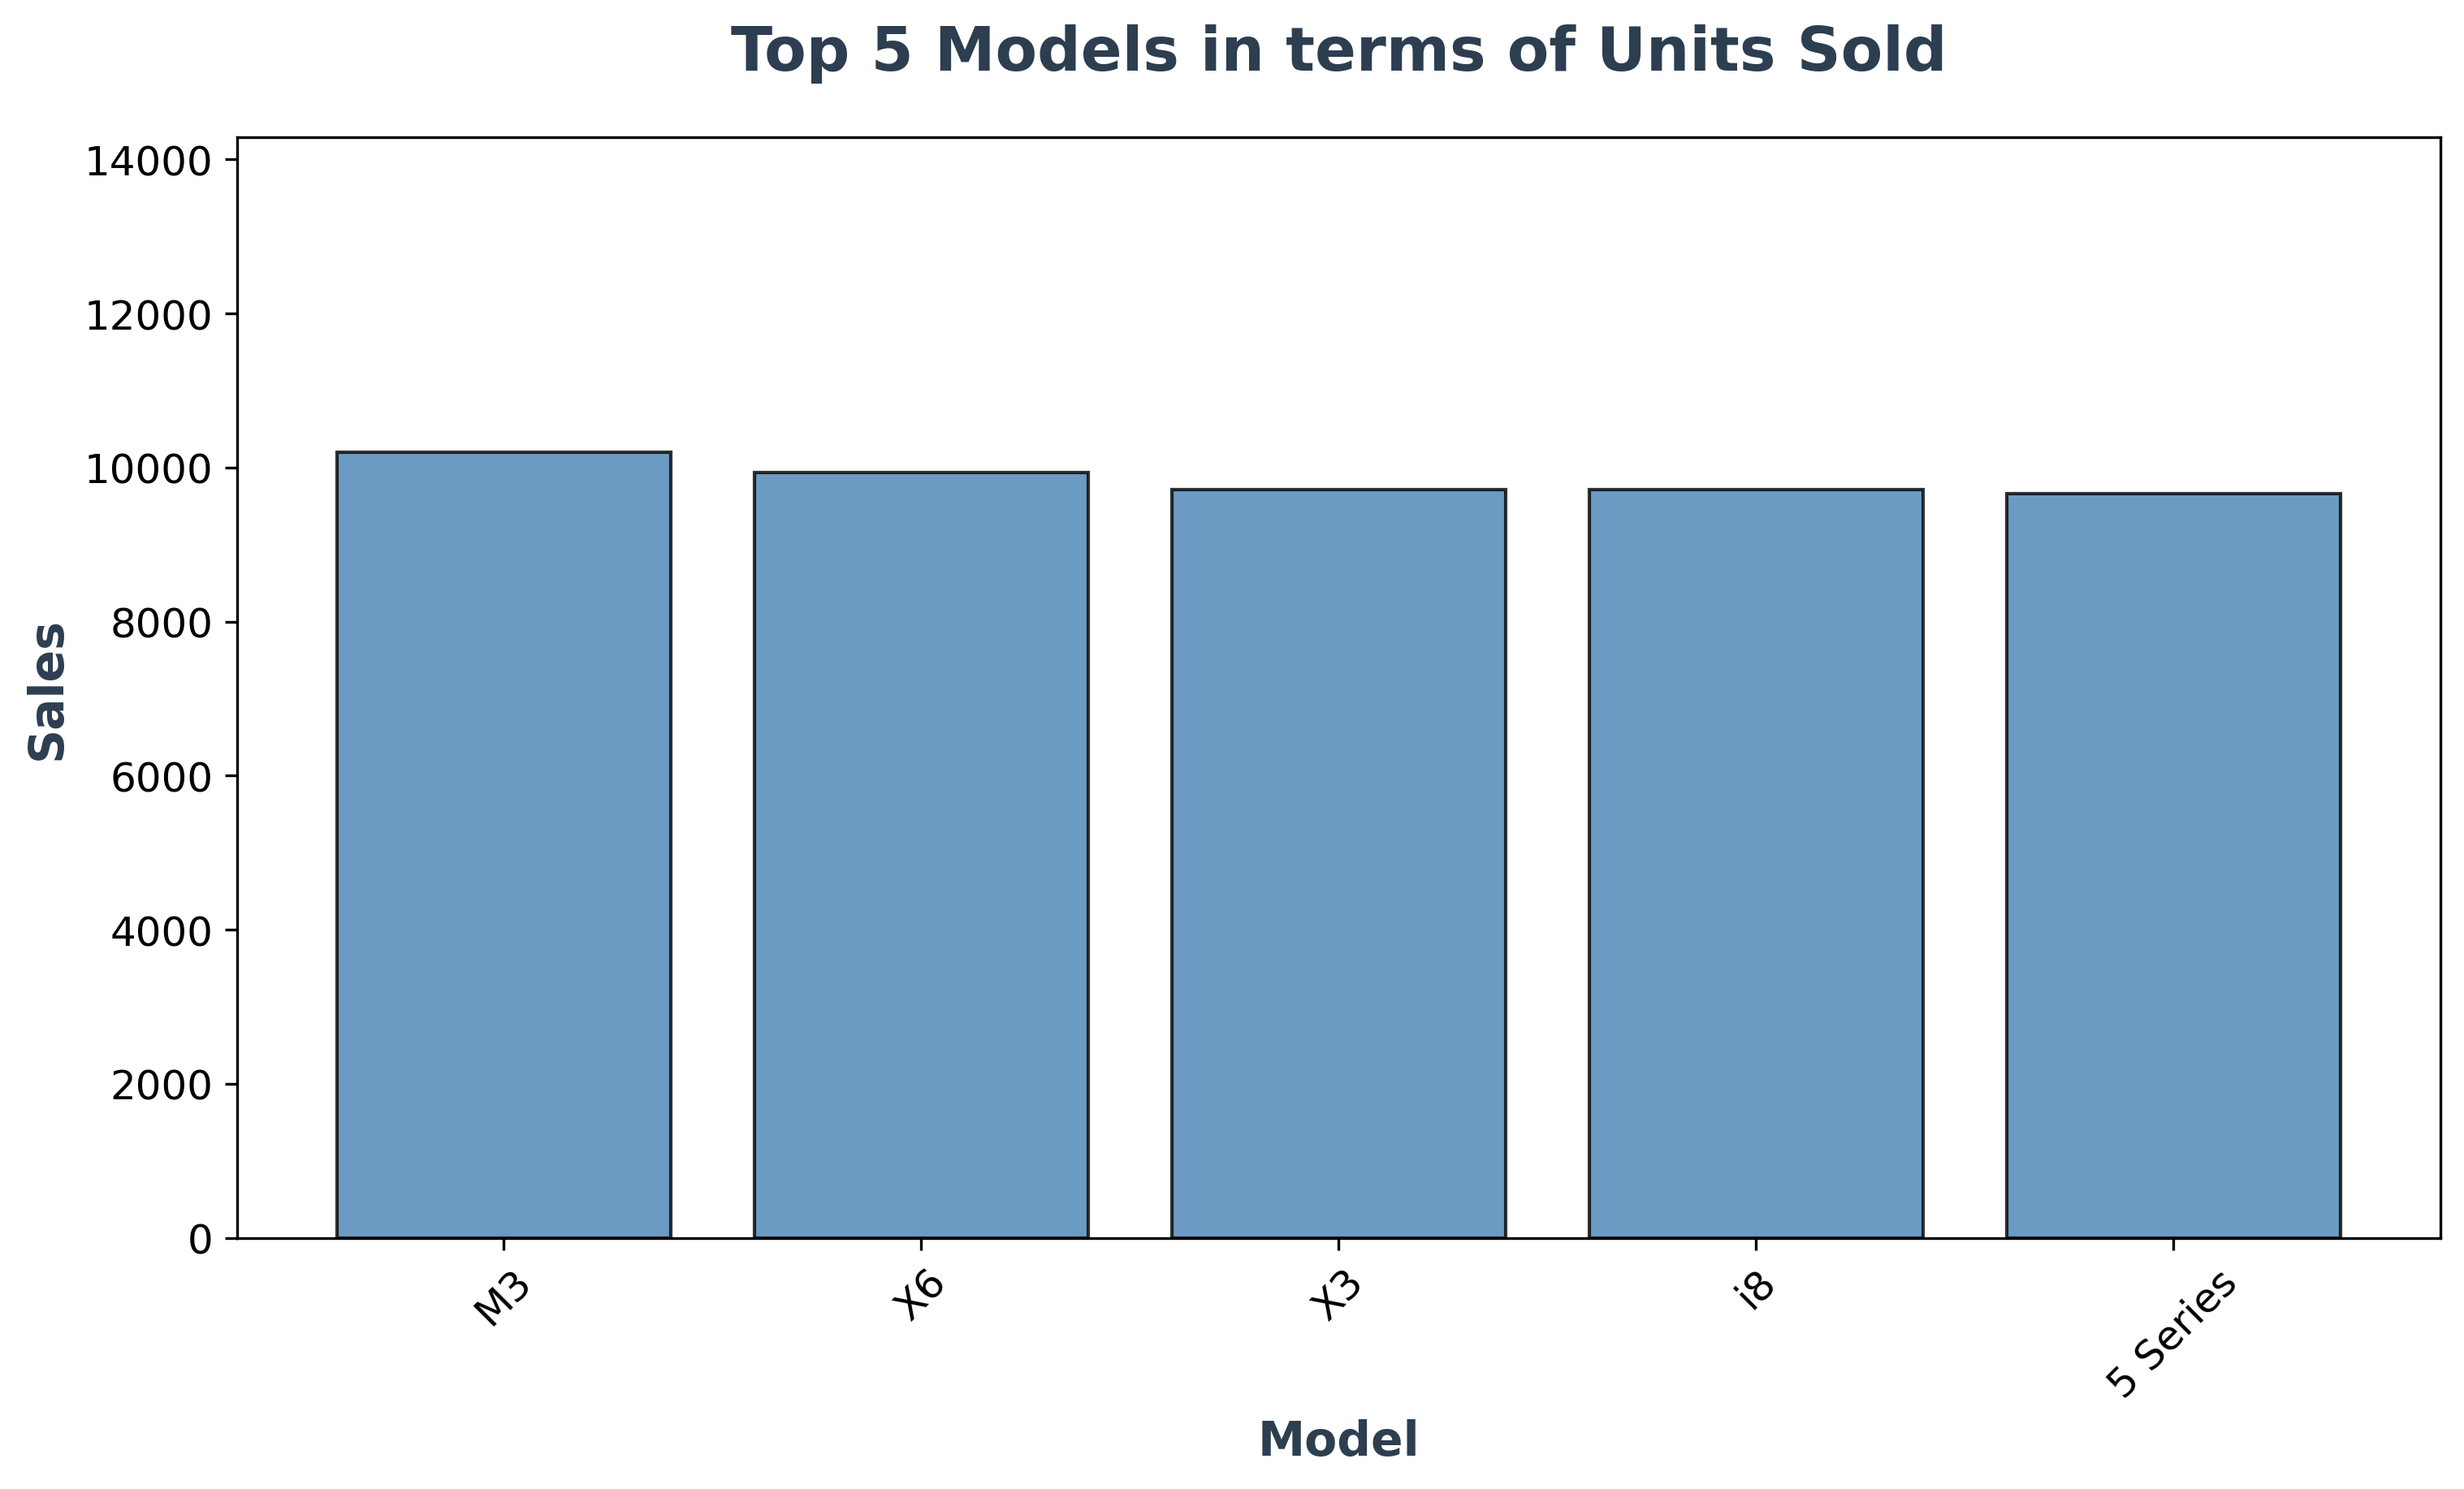

In [102]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10, 6),
    dpi=300,
    constrained_layout=True,
)
ax.bar(
    models,
    units_sold,
    width=0.8,
    bottom=0,
    align="center",
    color="steelblue",
    edgecolor="black",
    linewidth=1,
    alpha=0.8,
)

ax.set_title(
    "Top 5 Models in terms of Units Sold",
    fontsize=18,
    fontweight="bold",
    color="#2c3e50",
    pad=20,
)
ax.set_xlabel("Model", fontsize=14, fontweight="bold", color="#2c3e50")
ax.set_ylabel("Sales", fontsize=14, fontweight="bold", color="#2c3e50")

ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.set_ylim(0, max(units_sold) * 1.4)
plt.show()

### Monthly Seasonality Heatmap

In [24]:
monthly_season_check = spark.sql(
    """
    select month, year, sum(units_sold) as units_sold
    from bmw
    group by month, year
    order by year, month desc
    """
)

hot_months = spark.sql(
    """
    select month, sum(units_sold) as units_sold, 
           dense_rank() over (order by sum(units_sold) desc) as rank
    from bmw
    group by month
    order by units_sold desc
"""
)
hot_months.show()

+-----+----------+----+
|month|units_sold|rank|
+-----+----------+----+
|    8|     10456|   1|
|   12|     10365|   2|
|   11|     10039|   3|
|    3|      9941|   4|
|    7|      9718|   5|
|    9|      9710|   6|
|    5|      9691|   7|
|   10|      9530|   8|
|    6|      9265|   9|
|    4|      9188|  10|
|    1|      8976|  11|
|    2|      8537|  12|
+-----+----------+----+



In [27]:
avg_price_per_year = spark.sql(
    """
    select year, round(avg(price)) as avg_price 
    from bmw
    group by year
    order by year
    """
)
avg_price_per_year.show()

weighted_avg_price_per_year = spark.sql(
    """
    select year, 
           round(sum(price * units_sold) / sum(units_sold), 2) as weighted_average
    from bmw
    group by year
    order by year asc                                                           
"""
)
weighted_avg_price_per_year.show()

+----+---------+
|year|avg_price|
+----+---------+
|2010|  69186.0|
|2011|  70760.0|
|2012|  71607.0|
|2013|  73974.0|
|2014|  71214.0|
|2015|  69887.0|
|2016|  69444.0|
|2017|  70845.0|
|2018|  70872.0|
|2019|  72052.0|
|2020|  71094.0|
|2021|  72136.0|
|2022|  72139.0|
|2023|  69374.0|
|2024|  72584.0|
+----+---------+

+----+----------------+
|year|weighted_average|
+----+----------------+
|2010|        68705.18|
|2011|        70531.22|
|2012|        71887.54|
|2013|        73463.76|
|2014|        71907.35|
|2015|        69936.18|
|2016|         69792.5|
|2017|        70607.24|
|2018|        71610.08|
|2019|        72716.19|
|2020|        71324.32|
|2021|        72844.99|
|2022|        72027.41|
|2023|        68944.49|
|2024|        72918.11|
+----+----------------+



In [21]:
df.show(5)

+----+-----+--------+----------+---------+------------------+---------+-------------+---------+------------+
|Year|Month|   Model|Units_Sold|    Price|           Revenue|   Dealer|       Region|Fuel_Type|Transmission|
+----+-----+--------+----------+---------+------------------+---------+-------------+---------+------------+
|2020|    2|3 Series|        24| 47143.54|        1131444.96|Dealer_16|       Europe|   Diesel|      Manual|
|2020|   12|      i8|        16|129651.43|        2074422.88|Dealer_28|North America|   Petrol|      Manual|
|2013|    4|      i8|        22|151284.79|3328265.3800000004|Dealer_36|       Europe| Electric|      Manual|
|2017|   10|      X3|        26|  54855.8|         1426250.8| Dealer_1|       Europe| Electric|   Automatic|
|2014|    3|      X1|        16| 41550.74|         664811.84|Dealer_22|North America|   Petrol|   Automatic|
+----+-----+--------+----------+---------+------------------+---------+-------------+---------+------------+
only showing top 5 

In [33]:
fuelt_type_breakdown = spark.sql(
    """
    select fuel_type, 
           sum(units_sold) as total_units_sold,
           sum(revenue) as total_revenue 
    from BMW
    group by fuel_type
    order by total_units_sold desc
    """
)
fuelt_type_breakdown.show()

+---------+----------------+--------------------+
|fuel_type|total_units_sold|       total_revenue|
+---------+----------------+--------------------+
|   Diesel|           29133| 2.052416262180004E9|
|   Hybrid|           28855| 2.048510684599996E9|
| Electric|           28824|2.0809308148499987E9|
|   Petrol|           28604| 2.044759683809999E9|
+---------+----------------+--------------------+



In [43]:
transmission_preference = spark.sql(
    """
    select region, transmission, count(transmission) as total_number 
    from bmw
    group by region, transmission
    order by region, transmission
    """
)
transmission_preference.show()

regions_manuals = spark.sql(
    """
    select region, count(*) as manual_cars_sold
    from bmw
    where transmission = 'Manual'
    group by region
    order by manual_cars_sold desc
    """
)
regions_manuals.show()

+-------------+------------+------------+
|       region|transmission|total_number|
+-------------+------------+------------+
|       Africa|   Automatic|         436|
|       Africa|      Manual|         429|
|         Asia|   Automatic|         462|
|         Asia|      Manual|         470|
|       Europe|   Automatic|         441|
|       Europe|      Manual|         465|
|  Middle East|   Automatic|         441|
|  Middle East|      Manual|         484|
|North America|   Automatic|         493|
|North America|      Manual|         472|
|South America|   Automatic|         453|
|South America|      Manual|         454|
+-------------+------------+------------+

+-------------+----------------+
|       region|manual_cars_sold|
+-------------+----------------+
|  Middle East|             484|
|North America|             472|
|         Asia|             470|
|       Europe|             465|
|South America|             454|
|       Africa|             429|
+-------------+---------------

In [46]:
dealers = spark.sql(
    """
    select 
          dealer, 
          region, 
          sum(revenue) as total_revenue
    from bmw
    group by dealer, region
    order by total_revenue desc
    """
)
dealers.show()

top_dealers = spark.sql(
    """
    select 
          dealer, 
          region, 
          sum(revenue) as total_revenue
    from bmw
    group by dealer, region
    order by total_revenue desc
    limit 10
    """
)
top_dealers.show()

+---------+-------------+--------------------+
|   dealer|       region|       total_revenue|
+---------+-------------+--------------------+
|Dealer_14|  Middle East|4.9588029019999996E7|
|Dealer_44|       Africa|4.9347983029999994E7|
|Dealer_11|       Europe|       4.810701044E7|
| Dealer_1|         Asia|       4.712932392E7|
|Dealer_24|North America|       4.399832293E7|
|Dealer_48|South America| 4.354265828000001E7|
|Dealer_22|North America| 4.293964845999999E7|
|Dealer_20|South America|4.1773849949999996E7|
|Dealer_18|North America|4.1677514629999995E7|
|Dealer_37|       Europe|       4.163322733E7|
|Dealer_24|  Middle East|       4.147683955E7|
| Dealer_8|       Europe|       4.143931146E7|
|Dealer_10|South America|       4.141467223E7|
| Dealer_8|         Asia|       4.139054594E7|
|Dealer_48|North America|        4.12066519E7|
|Dealer_27|       Africa|4.0985443080000006E7|
|Dealer_47|       Africa| 4.026204123999999E7|
|Dealer_12|  Middle East| 4.008905357000001E7|
|Dealer_39|So

In [43]:
fuel_trend_over_years = spark.sql(
    """
    select year, fuel_type, count(fuel_type) as count_fuel from bmw
    group by year, fuel_type
    order by year
    """
)

fuel_trend_over_years.show()

+----+---------+----------+
|year|fuel_type|count_fuel|
+----+---------+----------+
|2010| Electric|       103|
|2010|   Petrol|        87|
|2010|   Diesel|        89|
|2010|   Hybrid|        91|
|2011|   Hybrid|        89|
|2011|   Diesel|       101|
|2011| Electric|        99|
|2011|   Petrol|       104|
|2012|   Hybrid|        83|
|2012|   Diesel|        90|
|2012| Electric|       111|
|2012|   Petrol|        85|
|2013| Electric|        92|
|2013|   Petrol|        90|
|2013|   Hybrid|        88|
|2013|   Diesel|        85|
|2014| Electric|        95|
|2014|   Diesel|        97|
|2014|   Petrol|        90|
|2014|   Hybrid|        87|
+----+---------+----------+
only showing top 20 rows
